# Linear ODE Model of Cancer Treatment

## Erin Angelini, 2020

The law of mass action model follows the linear ODE given by
$$
\frac{dx}{dt} = Ax, \quad A = \begin{bmatrix}b_S - d_S - k_{SR} & k_{RS} \\ k_{SR} & b_R - d_R - k_{RS} \end{bmatrix},
$$
where $x_1(t) = $# sensitive cells and $x_2(t) = $# resistant cells. The parameters can be summarized as follows:
- $b_S/b_R$: growth rate of sensitive/resistant cells;
- $d_S/d_R$: death rate of sensitive/resistant cells;
- $k_{SR}$: transition rate of sensitive cells becoming resistant cells;
- $k_{RS}$: transition rate of resistant cells becoming sensitive cells.

We model treatment (chemotherapy) via dependence of these parameters on the drug dose $m \in [0,100]$ (see $\texttt{paramters.py}$ for details).

In [1]:
%matplotlib inline
from pylab import *

Load model parameters:

In [14]:
%run 'parameters.py'

<Figure size 432x288 with 0 Axes>

In [3]:
# set default font sizes for plots

plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)

Plot pharmacodynamic (i.e., dose-response) curves: rate constants $d_S, d_R,$ and $k_{SR}$ as functions of drug dose $m$.

Text(0.5, 0, 'Drug dose')

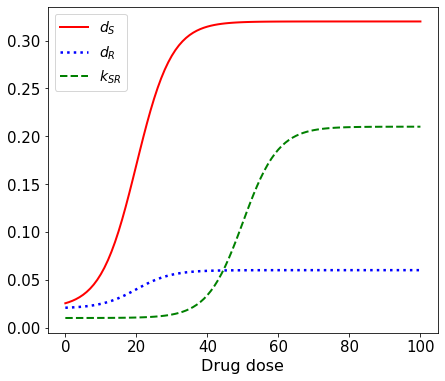

In [4]:
figure(figsize=(7,6))

plot(mvec,dS(mvec),'r-',linewidth = 2)
plot(mvec,dR(mvec),'b:',linewidth = 2.5)
plot(mvec,kSR(mvec),'g--', linewidth = 2)
legend([r"$d_S$",r"$d_R$",r"$k_{SR}$"])
xlabel('Drug dose')

Plot "total" rates $g_S + g_R \equiv (b_S - d_S) + (b_R - d_R)$ and $k_{SR} + k_{RS}$ as functions of drug dose $m$.

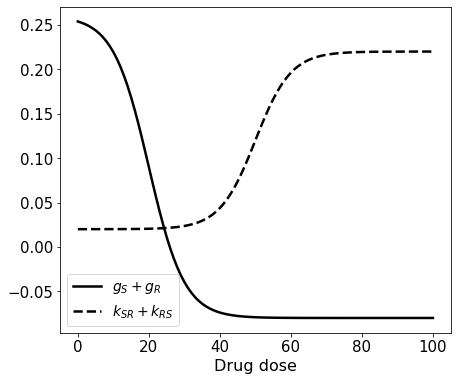

In [5]:
figure(figsize=(7,6))

plot(mvec,gS(mvec)+gR(mvec),'k-',linewidth=2.5,label=r"$g_S+g_R$")
plot(mvec,kSR(mvec)+kRS,'k--',linewidth = 2.5,label=r"$k_{SR}+k_{RS}$")
xlabel(r"Drug dose")
legend(loc='best')

Compute time to progression ($t_P$, or TTP) as a function of drug dose $m$, along with the approximation $t_P^*$. The following code also generates a plot of the total population $N(t) \equiv x_1(t) + x_2(t)$ for fixed drug doses (see $\texttt{mvals}$ in $\texttt{parameters.py}$), along with the turning point $t_{min}$ as a function of drug dose. The turning point $t_{min}$ is defined as the time point at which $N'(t) = 0$, i.e., when the total tumor size goes from decreasing to increasing.

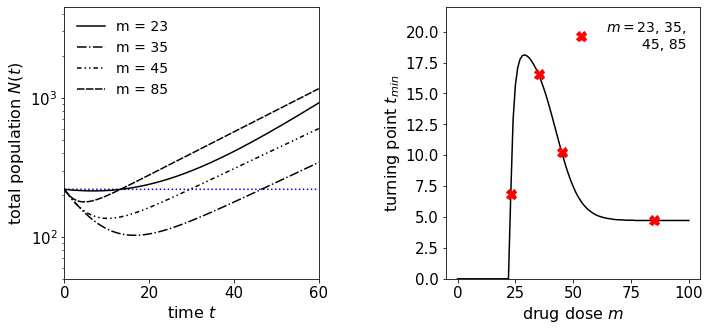

In [19]:
x0 = array([[200], [20]])
t_P = zeros(len(mvec))
approx_t = zeros(len(mvec))
t_min = zeros(len(mvec))

# for t_min plot
figure(figsize=(11.4,5))
subplot(121)
plot(t,(x0[0]+x0[1])*ones(len(t)),color = 'b',linestyle=':',linewidth=1.5,label="")
xlim([0,60])
ylim([50,4500])
counter=0

for m in mvec:
    # compute eigenvectors (v_1, v_2) of A and coefficients (c_1, c_2) for true solution
    V = array([[vec1(m), vec2(m)],[1,1]])
    c = inv(V).dot(x0)
    
    # exact solution xtrue
    xtrue = zeros((2,len(t)))
    xtrue[0,:] = c[0]*exp(lam1(m)*t)*V[0,0] + c[1]*exp(lam2(m)*t)*V[0,1] 
    xtrue[1,:] = c[0]*exp(lam1(m)*t)*V[1,0] + c[1]*exp(lam2(m)*t)*V[1,1] 
    
    # plot total population trajectory for m in mvals
    if m in mvals:
        # plot total population
        
        semilogy(t,xtrue[0,:]+xtrue[1,:],color='k',linestyle=stylevec[counter],label="m = "+str(m),linewidth = 1.5)
        legend(loc="best",frameon=False)
        xlabel(r"time $t$")
        ylabel(r"total population $N(t)$")
        
        counter += 1
    
    # compute turning point t_min (where x_1'(t) + x_2'(t) = 0)
    idx = abs(gS(m)*xtrue[0,:]+gR(m)*xtrue[1,:]).argmin() # approximate this point
    t_min[m] = t[idx]
    
    # compute time to progression t_P (where x_1(t) + x_2(t) > x_1(0) + x_2(0))
    for j in range(1,len(t)):
        if xtrue[0,j]+xtrue[1,j] > x0[0]+x0[1]:
            break
    t_P[m]=t[j]
    
    # compute approximation to TTP
    approx_t[m] = (1/lam1(m))*log((x0[0]+x0[1])/(c[0]*(V[0,0]+V[1,0]))) 
    
subplot(122)
plot(t_min,color = 'k',linestyle='-',linewidth = 1.5)
mystring = r"$m = $"+str(mvals[0])+", "+str(mvals[1])+", \n        "+str(mvals[2])+", "+str(mvals[3])
plot(mvals,t_min[mvals],'X',color = 'r',markersize=10,label=mystring)
legend(loc="best",frameon=False)
xlabel(r"drug dose $m$")
ylabel(r"turning point $t_{min}$")
ylim([0,22])
plt.subplots_adjust(wspace=0.5)

Plot $t_P$ and $t_P^*$.

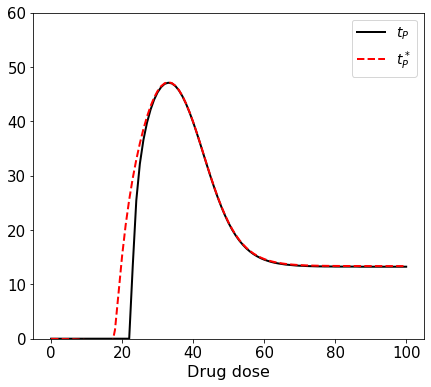

In [7]:
figure(figsize=(7,6))
plot(t_P,'k-',linewidth = 2,label=r"$t_P$")
plot(approx_t,'r--', linewidth = 2,label=r"$t_P^*$")
ylim([0,60])
xlabel("Drug dose")
legend(loc="best")

# uncomment to also plot absolute error of $t_P^*$

#figure(figsize=(7,6))
#plot(abs(approx_t - t_P), 'b-', linewidth = 2)
#ylim([0,0.155])
#xlabel("Drug dose")

Compare $t_{min}$ as a function of drug dose $m$ to TTP.

Text(0, 0.5, 'time to progression $t_P$')

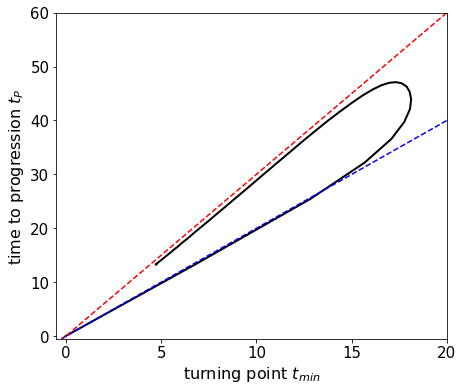

In [8]:
figure(figsize=(7,6))

plot(t_min,t_P,'k-',linewidth = 2)
plot(linspace(-5,25),2*linspace(-5,25),'b--',linewidth=1.5) # reference line of slope 2
plot(linspace(-5,25),3*linspace(-5,25),'r--',linewidth=1.5) # reference line of slope 3
xlim([-0.5,20])
ylim([-0.5,60])
xlabel(r"turning point $t_{min}$")
ylabel(r"time to progression $t_P$")

Plot eigenvalues $\lambda_{1,2}$ of $A$ as functions of drug dose $m$.

(-0.36, 0.19)

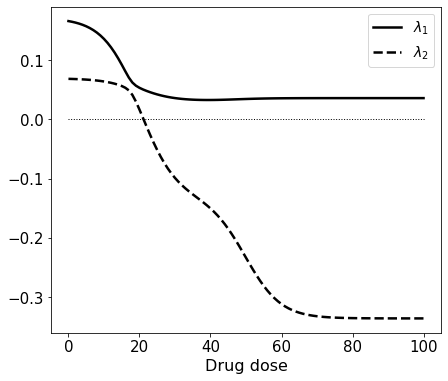

In [9]:
figure(figsize=(7,6))
mvec = array(range(101))
plot(mvec,zeros(len(mvec)),'k:',linewidth = 1,label = "")
plot(mvec,lam1(mvec),'k-',linewidth= 2.5,label=r"$\lambda_1$")
plot(mvec,lam2(mvec),'k--',linewidth = 2.5,label=r"$\lambda_2$")
xlabel(r"Drug dose")
#title(r"Eigenvalues of $A$ as a function of drug dose")
legend()
ylim([-0.36,0.19])